
# Basic Classification
Follows the tutorial at tensorflow.org for basic classification using the Fashion MNIST dataset.

https://www.tensorflow.org/tutorials/keras/basic_classification

In [ ]:
# To install tensorflow, install the module via pip and restart the kernel
import pip
pip.main(['install', 'tensorflow'])

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# display TensorFlow version
print(tf.__version__)

1.11.0


## Import Fashion MNIST dataset
70,000 grayscale images in 10 categories. Each image is an individual article of clothing at low resolution (28x28 pixels). Loads 60,000 images to train the network and 10,000 images to evaluate its accuracy.

In [7]:
fashion_mnist = keras.datasets.fashion_mnist

In [8]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 2s 1us/step


In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explore the data

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
# number of images in training set
len(train_images)

60000

In [12]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [13]:
test_images.shape

(10000, 28, 28)

In [14]:
# number of images in test set
len(test_labels)

10000

## Preprocess the data
Each pixel value falls in the range of 0 to 255. Pixel values need to be scaled to a range of 0 to 1, before feeding to the neutral network model.

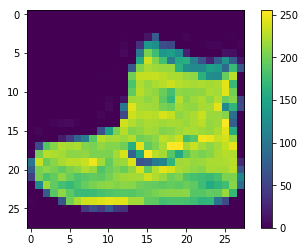

In [15]:
# show the first image in the training set
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

In [16]:
train_images = train_images / 255.0
test_images = test_images / 255.0

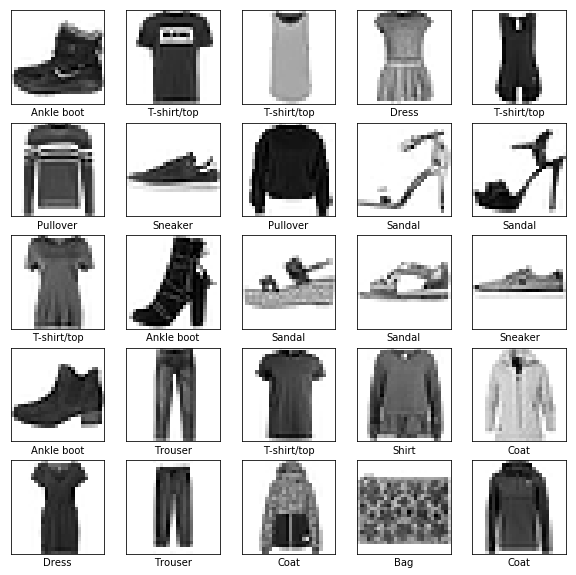

In [17]:
# show the first 25 images from the training set and display the class name
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

## Build the model
Requires configuring the layers of the model and then compiling the model. The first layer (Flatten) transforms the 28x28 2d-array into a 1d-array of 28*28 = 784 pixels. The subsequent layers (Dense) are fully-connected neural layers.

In [18]:
# Setup the layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [19]:
# Compile the model
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

* **Optimizer** - This is how the model is updated based on the data it sees and its loss function.
* **Loss function** - This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
* **Metrics** - Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.

## Train the model
Fit the model to the training data.

In [20]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 125us/step - loss: 0.4986 - acc: 0.8241
Epoch 2/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.3704 - acc: 0.8667
Epoch 3/5
60000/60000 [==============================] - 6s 96us/step - loss: 0.3328 - acc: 0.8781
Epoch 4/5
60000/60000 [==============================] - 8s 127us/step - loss: 0.3092 - acc: 0.8861
Epoch 5/5
60000/60000 [==============================] - 7s 118us/step - loss: 0.2920 - acc: 0.8922


Model accuracy on training data = 89.22%

## Evaluate accuracy
Compare how the model performs on the test dataset.

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 59us/step
Test accuracy: 0.8754


Model accuracy on test data = 87.54%

This gap between the training accuracy and the test accuracy is an example of *overfitting* (i.e. when a ML model performs worse on new data than on its training data).

## Make predictions

In [22]:
predictions = model.predict(test_images)

In [23]:
predictions[0]

array([3.2020550e-06, 4.0874017e-08, 1.8685314e-06, 1.0927856e-06,
       1.9567797e-06, 2.8756905e-02, 9.5823352e-06, 2.9662441e-02,
       1.4766240e-04, 9.4141519e-01], dtype=float32)

A prediction is an array of 10 numbers (each represents the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing (i.e. labels). The label with the highest confidence value is taken as the prediction.

In [25]:
highest_confidence = np.argmax(predictions[0])
class_names[highest_confidence]

'Ankle boot'

In [26]:
# cross check with corresponding test label to see whether prediction is correct
class_names[test_labels[0]]

'Ankle boot'

Prediction correct

In [27]:
# let's graph the full set of "confidence" values

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

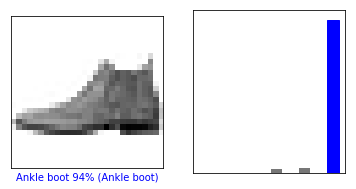

In [28]:
# using the above functions, let's first look at predictions[0]
i = 0

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

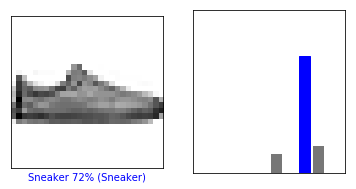

In [29]:
# now predictions[12]
i = 12

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

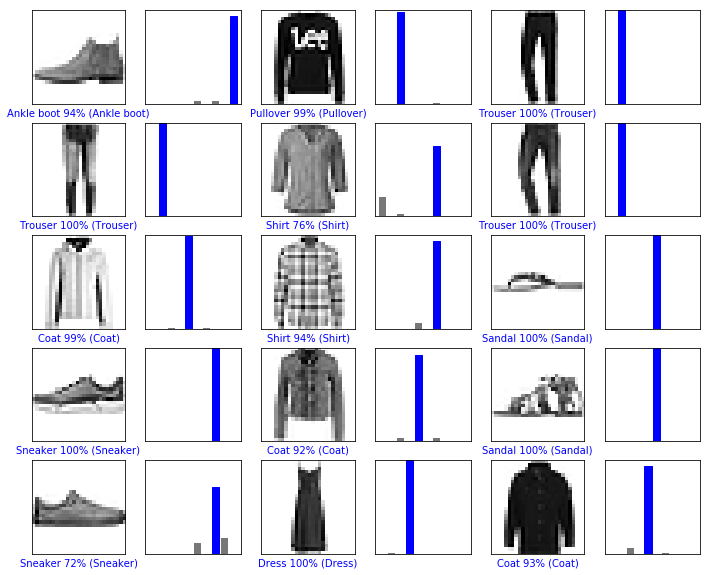

In [30]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [31]:
# use the trained model to make a prediction about a single image
img = test_images[0]

# tf.keras models are optimized to make predictions on a batch (i.e. collection).
# Add the image to a batch where it's the only member
img = (np.expand_dims(img,0))

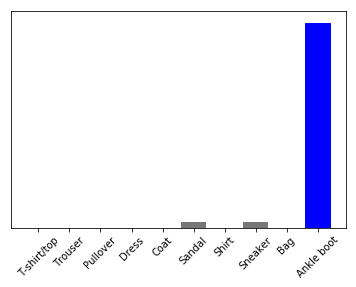

In [32]:
# make prediction
predictions_single = model.predict(img)

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [33]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.